In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#Data preprocessing for half Second Window

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis/Dataset/RAW/dataset_5secondWindow.csv')
df

,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,16170,78,NaN,100,9.811476,9.758895,9.849411,0.014626,0.029340,0.029014,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
1,15871,145,NaN,100,9.939207,7.707437,17.146631,1.775944,0.999925,0.999903,...,89.200210,89.065143,89.335277,0.191013,16.539349,16.539349,16.539349,0.628595,Car,U12
2,16811,150,NaN,100,9.827178,9.804817,9.849262,0.011199,0.665215,0.665213,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
3,15831,105,NaN,77,9.673039,7.659674,12.304298,0.862553,0.996221,0.993781,...,87.470377,87.470377,87.470377,2.284186,17.739895,17.739895,17.739895,0.628595,Car,U12
4,876,77,NaN,100,9.993466,8.965621,10.891645,0.504117,0.563792,0.521799,...,89.770732,89.770732,89.770732,0.006389,9.000000,9.000000,9.000000,NaN,Car,U1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,14125,4,NaN,100,10.066610,4.564648,13.414389,3.373972,0.986319,0.974523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking,U2
5889,19582,32,NaN,10,9.964271,8.768007,11.454213,0.665529,0.648602,0.648343,...,NaN,NaN,NaN,NaN,31.960054,31.960054,31.960054,NaN,Train,U3
5890,16178,86,NaN,100,9.812893,9.772881,9.862587,0.017633,0.024392,0.024081,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
5891,10973,199,NaN,100,9.831144,9.807347,9.874450,0.013485,0.481212,0.481209,...,NaN,NaN,NaN,NaN,1.090415,1.090415,1.090415,NaN,Still,U10


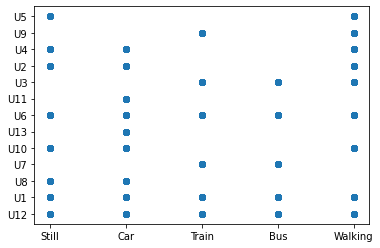

In [ ]:
plt.scatter(df['target'],df['user'])

In [ ]:
df['target'].value_counts()

Car        1180
Still      1179
Train      1179
Bus        1178
Walking    1177
Name: target, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5893 entries, 0 to 5892
Data columns (total 70 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   id                                               5893 non-null   int64  
 1   time                                             5893 non-null   int64  
 2   activityrecognition#0                            0 non-null      float64
 3   activityrecognition#1                            5893 non-null   int64  
 4   android.sensor.accelerometer#mean                5893 non-null   float64
 5   android.sensor.accelerometer#min                 5893 non-null   float64
 6   android.sensor.accelerometer#max                 5893 non-null   float64
 7   android.sensor.accelerometer#std                 5893 non-null   float64
 8   android.sensor.game_rotation_vector#mean         5094 non-null   float64
 9   android.sensor.game_rotation_v

In [ ]:
column_lst = list(df.columns)
mostly_null = []
partially_null = []
no_null = []

In [ ]:
print(column_lst)

['id', 'time', 'activityrecognition#0', 'activityrecognition#1', 'android.sensor.accelerometer#mean', 'android.sensor.accelerometer#min', 'android.sensor.accelerometer#max', 'android.sensor.accelerometer#std', 'android.sensor.game_rotation_vector#mean', 'android.sensor.game_rotation_vector#min', 'android.sensor.game_rotation_vector#max', 'android.sensor.game_rotation_vector#std', 'android.sensor.gravity#mean', 'android.sensor.gravity#min', 'android.sensor.gravity#max', 'android.sensor.gravity#std', 'android.sensor.gyroscope#mean', 'android.sensor.gyroscope#min', 'android.sensor.gyroscope#max', 'android.sensor.gyroscope#std', 'android.sensor.gyroscope_uncalibrated#mean', 'android.sensor.gyroscope_uncalibrated#min', 'android.sensor.gyroscope_uncalibrated#max', 'android.sensor.gyroscope_uncalibrated#std', 'android.sensor.light#mean', 'android.sensor.light#min', 'android.sensor.light#max', 'android.sensor.light#std', 'android.sensor.linear_acceleration#mean', 'android.sensor.linear_acceler

In [ ]:
for i in column_lst:
    percentage = (df[i].isnull().sum()*100)/5893
    if percentage >= 60:
        mostly_null.append(i)
    elif df[i].isnull().sum() > 0:
        partially_null.append(i)
    elif df[i].isnull().sum() == 0:
        no_null.append(i)

    print('Feature Name:',i)
    print("Number of missing values: ",df[i].isnull().sum(),"out of 5893")
    print("Missing percentage:"+str(percentage)+"%")
    print()

Feature Name: id
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: time
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: activityrecognition#0
Number of missing values:  5893 out of 5893
Missing percentage:100.0%

Feature Name: activityrecognition#1
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#mean
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#min
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#max
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#std
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.game_rotation_vector#mean
Number of missing values:  799 out of 5893
Missing percentage:13.558459188868149%

Feature Name: android.sensor.gam

In [ ]:
if len(mostly_null)+len(partially_null)+len(no_null) == len(column_lst):
    print("True")
else:
    print("False")

True


In [ ]:
mostly_null

['activityrecognition#0',
 'android.sensor.light#std',
 'android.sensor.pressure#mean',
 'android.sensor.pressure#min',
 'android.sensor.pressure#max',
 'android.sensor.pressure#std',
 'android.sensor.proximity#mean',
 'android.sensor.proximity#min',
 'android.sensor.proximity#max',
 'android.sensor.proximity#std',
 'android.sensor.step_counter#mean',
 'android.sensor.step_counter#min',
 'android.sensor.step_counter#max',
 'android.sensor.step_counter#std',
 'speed#std']

In [ ]:
for i in mostly_null:
    df = df.drop([i], axis = 1)

In [ ]:
df = df.drop(['id'], axis = 1)

In [ ]:
df

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,android.sensor.game_rotation_vector#std,...,android.sensor.rotation_vector#std,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,target,user
0,78,100,9.811476,9.758895,9.849411,0.014626,0.029340,0.029014,0.029526,0.000119,...,0.002109,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,Still,U12
1,145,100,9.939207,7.707437,17.146631,1.775944,0.999925,0.999903,0.999946,0.000030,...,0.000026,89.200210,89.065143,89.335277,0.191013,16.539349,16.539349,16.539349,Car,U12
2,150,100,9.827178,9.804817,9.849262,0.011199,0.665215,0.665213,0.665218,0.000004,...,0.011312,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,Still,U12
3,105,77,9.673039,7.659674,12.304298,0.862553,0.996221,0.993781,0.998661,0.003451,...,0.002788,87.470377,87.470377,87.470377,2.284186,17.739895,17.739895,17.739895,Car,U12
4,77,100,9.993466,8.965621,10.891645,0.504117,0.563792,0.521799,0.672664,0.064792,...,0.025608,89.770732,89.770732,89.770732,0.006389,9.000000,9.000000,9.000000,Car,U1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,4,100,10.066610,4.564648,13.414389,3.373972,0.986319,0.974523,0.992084,0.007186,...,0.008767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking,U2
5889,32,10,9.964271,8.768007,11.454213,0.665529,0.648602,0.648343,0.648974,0.000331,...,0.018447,NaN,NaN,NaN,NaN,31.960054,31.960054,31.960054,Train,U3
5890,86,100,9.812893,9.772881,9.862587,0.017633,0.024392,0.024081,0.024696,0.000211,...,0.002659,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,Still,U12
5891,199,100,9.831144,9.807347,9.874450,0.013485,0.481212,0.481209,0.481216,0.000002,...,0.000005,NaN,NaN,NaN,NaN,1.090415,1.090415,1.090415,Still,U10


In [ ]:
partially_null

['android.sensor.game_rotation_vector#mean',
 'android.sensor.game_rotation_vector#min',
 'android.sensor.game_rotation_vector#max',
 'android.sensor.game_rotation_vector#std',
 'android.sensor.gravity#mean',
 'android.sensor.gravity#min',
 'android.sensor.gravity#max',
 'android.sensor.gravity#std',
 'android.sensor.gyroscope#mean',
 'android.sensor.gyroscope#min',
 'android.sensor.gyroscope#max',
 'android.sensor.gyroscope#std',
 'android.sensor.gyroscope_uncalibrated#mean',
 'android.sensor.gyroscope_uncalibrated#min',
 'android.sensor.gyroscope_uncalibrated#max',
 'android.sensor.gyroscope_uncalibrated#std',
 'android.sensor.light#mean',
 'android.sensor.light#min',
 'android.sensor.light#max',
 'android.sensor.linear_acceleration#mean',
 'android.sensor.linear_acceleration#min',
 'android.sensor.linear_acceleration#max',
 'android.sensor.linear_acceleration#std',
 'android.sensor.magnetic_field#mean',
 'android.sensor.magnetic_field#min',
 'android.sensor.magnetic_field#max',
 'an

In [ ]:
for i in partially_null:
    print("Partially Null Feature Name:",i)
    print("Number of unique values: ",len(df[i].unique()),"and Number of missing values: ",df[i].isnull().sum())
    print()

Partially Null Feature Name: android.sensor.game_rotation_vector#mean
Number of unique values:  4922 and Number of missing values:  799

Partially Null Feature Name: android.sensor.game_rotation_vector#min
Number of unique values:  4913 and Number of missing values:  799

Partially Null Feature Name: android.sensor.game_rotation_vector#max
Number of unique values:  4914 and Number of missing values:  799

Partially Null Feature Name: android.sensor.game_rotation_vector#std
Number of unique values:  4472 and Number of missing values:  800

Partially Null Feature Name: android.sensor.gravity#mean
Number of unique values:  2367 and Number of missing values:  497

Partially Null Feature Name: android.sensor.gravity#min
Number of unique values:  2739 and Number of missing values:  497

Partially Null Feature Name: android.sensor.gravity#max
Number of unique values:  2736 and Number of missing values:  497

Partially Null Feature Name: android.sensor.gravity#std
Number of unique values:  134

In [ ]:
for i in partially_null:
    df[i] = df[i].fillna(0)

In [ ]:
newcolumns = list(df.columns)

In [ ]:
for i in newcolumns:
    
    print('Feature Name:',i)
    print("Number of missing values: ",df[i].isnull().sum(),"out of 5893")
    print("Missing percentage:"+str(percentage)+"%")
    print()

Feature Name: time
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: activityrecognition#1
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#mean
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#min
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#max
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#std
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.game_rotation_vector#mean
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.game_rotation_vector#min
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.game_rotation_vector#max
Number of missing values:  0 out of 5893
Missing percentage:0.0%


In [ ]:
df

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,android.sensor.game_rotation_vector#std,...,android.sensor.rotation_vector#std,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,target,user
0,78,100,9.811476,9.758895,9.849411,0.014626,0.029340,0.029014,0.029526,0.000119,...,0.002109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Still,U12
1,145,100,9.939207,7.707437,17.146631,1.775944,0.999925,0.999903,0.999946,0.000030,...,0.000026,89.200210,89.065143,89.335277,0.191013,16.539349,16.539349,16.539349,Car,U12
2,150,100,9.827178,9.804817,9.849262,0.011199,0.665215,0.665213,0.665218,0.000004,...,0.011312,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Still,U12
3,105,77,9.673039,7.659674,12.304298,0.862553,0.996221,0.993781,0.998661,0.003451,...,0.002788,87.470377,87.470377,87.470377,2.284186,17.739895,17.739895,17.739895,Car,U12
4,77,100,9.993466,8.965621,10.891645,0.504117,0.563792,0.521799,0.672664,0.064792,...,0.025608,89.770732,89.770732,89.770732,0.006389,9.000000,9.000000,9.000000,Car,U1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,4,100,10.066610,4.564648,13.414389,3.373972,0.986319,0.974523,0.992084,0.007186,...,0.008767,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Walking,U2
5889,32,10,9.964271,8.768007,11.454213,0.665529,0.648602,0.648343,0.648974,0.000331,...,0.018447,0.000000,0.000000,0.000000,0.000000,31.960054,31.960054,31.960054,Train,U3
5890,86,100,9.812893,9.772881,9.862587,0.017633,0.024392,0.024081,0.024696,0.000211,...,0.002659,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Still,U12
5891,199,100,9.831144,9.807347,9.874450,0.013485,0.481212,0.481209,0.481216,0.000002,...,0.000005,0.000000,0.000000,0.000000,0.000000,1.090415,1.090415,1.090415,Still,U10


In [ ]:
df['target'].unique()

array(['Still', 'Car', 'Train', 'Bus', 'Walking'], dtype=object)

In [ ]:
df['target'] = df['target'].map({'Bus':0,'Car':1,'Still':2,'Train':3,'Walking':4}) 

In [ ]:
df['user'].unique()

array(['U12', 'U1', 'U8', 'U7', 'U10', 'U13', 'U6', 'U11', 'U3', 'U2',
       'U4', 'U9', 'U5'], dtype=object)

In [ ]:
df['user'] = df['user'].map({'U1':0,'U2':1,'U3':2,'U4':3,'U5':4,'U6':5,'U7':6,'U8':7,'U9':8,'U10':9,'U11':10,'U12':11,'U13':12}) 

In [ ]:
df

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,android.sensor.game_rotation_vector#std,...,android.sensor.rotation_vector#std,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,target,user
0,78,100,9.811476,9.758895,9.849411,0.014626,0.029340,0.029014,0.029526,0.000119,...,0.002109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,11
1,145,100,9.939207,7.707437,17.146631,1.775944,0.999925,0.999903,0.999946,0.000030,...,0.000026,89.200210,89.065143,89.335277,0.191013,16.539349,16.539349,16.539349,1,11
2,150,100,9.827178,9.804817,9.849262,0.011199,0.665215,0.665213,0.665218,0.000004,...,0.011312,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,11
3,105,77,9.673039,7.659674,12.304298,0.862553,0.996221,0.993781,0.998661,0.003451,...,0.002788,87.470377,87.470377,87.470377,2.284186,17.739895,17.739895,17.739895,1,11
4,77,100,9.993466,8.965621,10.891645,0.504117,0.563792,0.521799,0.672664,0.064792,...,0.025608,89.770732,89.770732,89.770732,0.006389,9.000000,9.000000,9.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,4,100,10.066610,4.564648,13.414389,3.373972,0.986319,0.974523,0.992084,0.007186,...,0.008767,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,1
5889,32,10,9.964271,8.768007,11.454213,0.665529,0.648602,0.648343,0.648974,0.000331,...,0.018447,0.000000,0.000000,0.000000,0.000000,31.960054,31.960054,31.960054,3,2
5890,86,100,9.812893,9.772881,9.862587,0.017633,0.024392,0.024081,0.024696,0.000211,...,0.002659,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,11
5891,199,100,9.831144,9.807347,9.874450,0.013485,0.481212,0.481209,0.481216,0.000002,...,0.000005,0.000000,0.000000,0.000000,0.000000,1.090415,1.090415,1.090415,2,9


In [ ]:
df = df.drop(['user'], axis = 1)

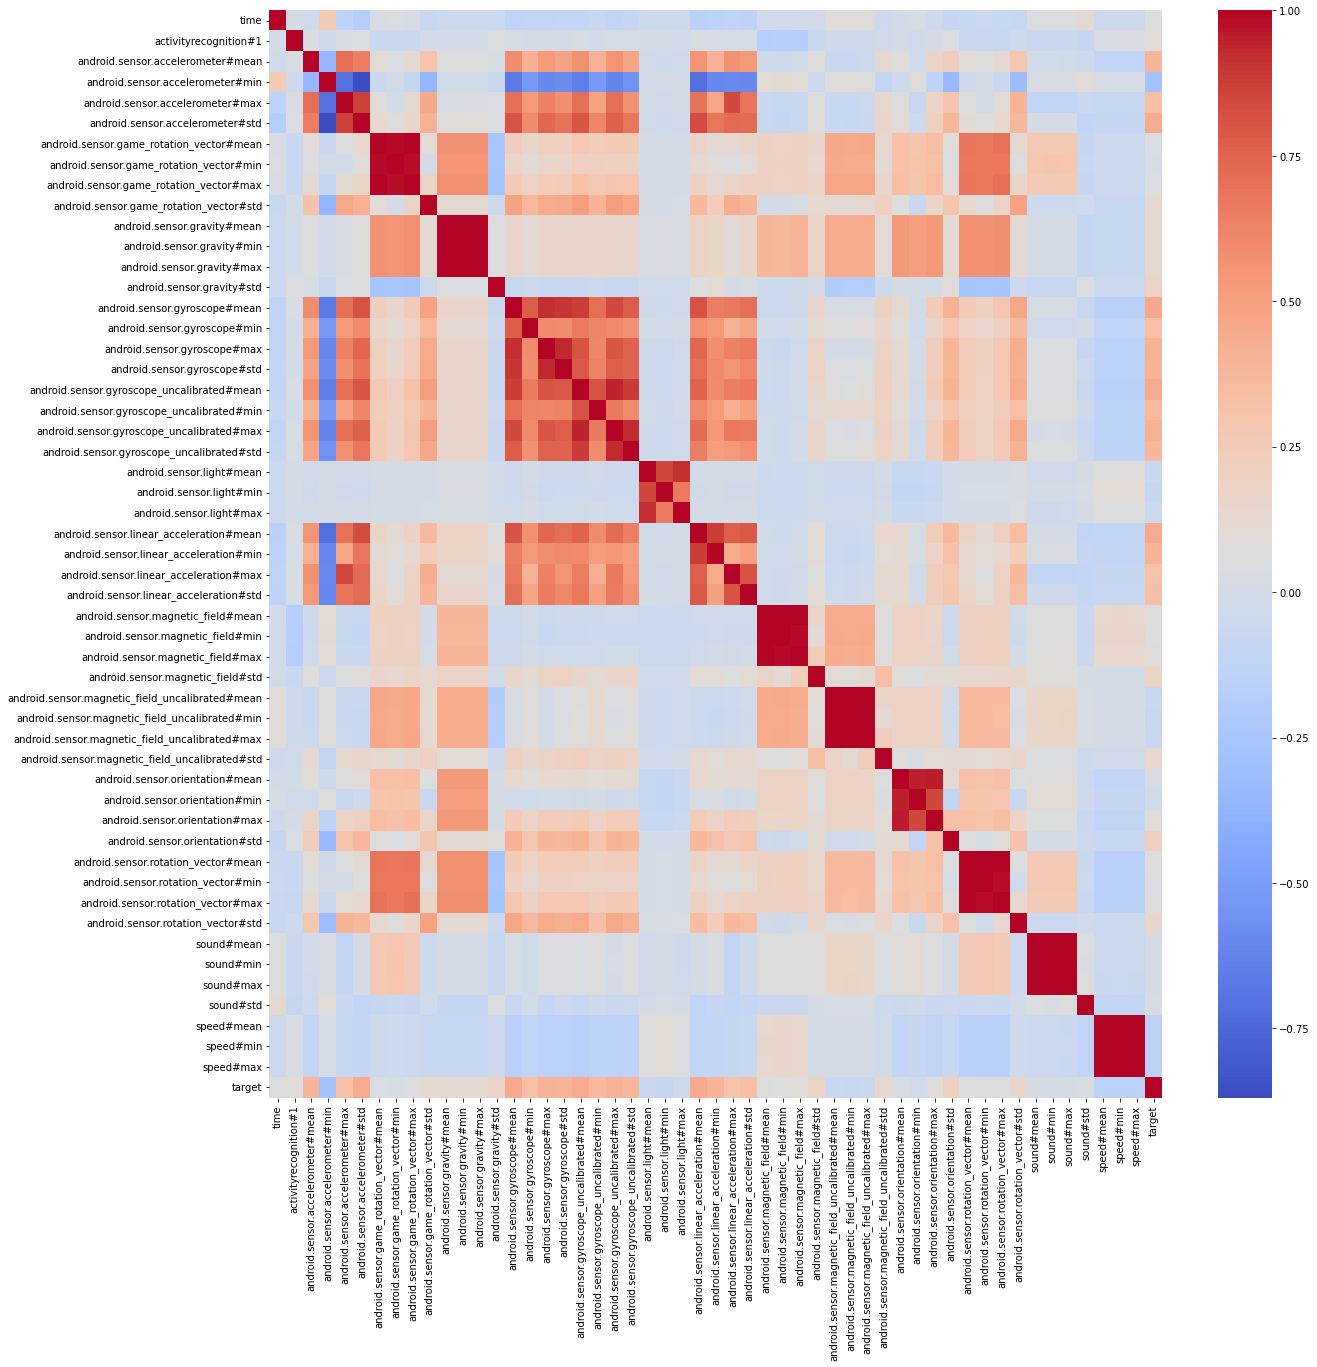

In [ ]:
corr = df.corr()

plt.figure(figsize=(20,20))  
sns.heatmap(corr, annot = False, cmap = 'coolwarm')

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df, 0.7)
len(set(corr_features))

32

In [ ]:
corr_features

{'android.sensor.accelerometer#max',
 'android.sensor.accelerometer#std',
 'android.sensor.game_rotation_vector#max',
 'android.sensor.game_rotation_vector#min',
 'android.sensor.gravity#max',
 'android.sensor.gravity#min',
 'android.sensor.gyroscope#max',
 'android.sensor.gyroscope#mean',
 'android.sensor.gyroscope#min',
 'android.sensor.gyroscope#std',
 'android.sensor.gyroscope_uncalibrated#max',
 'android.sensor.gyroscope_uncalibrated#mean',
 'android.sensor.gyroscope_uncalibrated#min',
 'android.sensor.gyroscope_uncalibrated#std',
 'android.sensor.light#max',
 'android.sensor.light#min',
 'android.sensor.linear_acceleration#max',
 'android.sensor.linear_acceleration#mean',
 'android.sensor.linear_acceleration#min',
 'android.sensor.linear_acceleration#std',
 'android.sensor.magnetic_field#max',
 'android.sensor.magnetic_field#min',
 'android.sensor.magnetic_field_uncalibrated#max',
 'android.sensor.magnetic_field_uncalibrated#min',
 'android.sensor.orientation#max',
 'android.sens

In [ ]:
df1 = df.drop(corr_features,axis=1)

In [ ]:
df1

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#std,android.sensor.gravity#mean,android.sensor.gravity#std,android.sensor.light#mean,android.sensor.magnetic_field#mean,...,android.sensor.magnetic_field_uncalibrated#mean,android.sensor.magnetic_field_uncalibrated#std,android.sensor.orientation#mean,android.sensor.orientation#std,android.sensor.rotation_vector#mean,android.sensor.rotation_vector#std,sound#mean,sound#std,speed#mean,target
0,78,100,9.811476,9.758895,0.029340,0.000119,9.806650,4.780000e-07,0.000,57.099638,...,51.363566,0.080899,354.286933,0.245676,0.050413,0.002109,0.000000,0.000000,0.000000,2
1,145,100,9.939207,7.707437,0.999925,0.000030,9.806624,6.470000e-07,0.000,29.351288,...,82.767760,0.506105,332.695577,1.705816,0.999981,0.000026,89.200210,0.191013,16.539349,1
2,150,100,9.827178,9.804817,0.665215,0.000004,9.806650,2.820000e-07,2.000,29.904927,...,55.695716,0.128945,74.752653,0.413704,0.610456,0.011312,0.000000,0.000000,0.000000,2
3,105,77,9.673039,7.659674,0.996221,0.003451,9.806638,2.120000e-06,0.000,37.836471,...,95.743821,0.112446,373.556039,8.870011,0.998112,0.002788,87.470377,2.284186,17.739895,1
4,77,100,9.993466,8.965621,0.563792,0.064792,9.806650,2.640000e-07,30.000,78.375718,...,157.429217,0.895633,193.201458,181.729455,0.322242,0.025608,89.770732,0.006389,9.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,4,100,10.066610,4.564648,0.986319,0.007186,9.806650,2.230000e-07,4.000,28.551588,...,56.502261,23.640120,198.025171,0.858121,0.932682,0.008767,0.000000,0.000000,0.000000,4
5889,32,10,9.964271,8.768007,0.648602,0.000331,9.806650,8.170000e-07,126.123,40.665641,...,85.122017,4.265621,35.427524,1.794702,0.295905,0.018447,0.000000,0.000000,31.960054,3
5890,86,100,9.812893,9.772881,0.024392,0.000211,9.806650,4.290000e-07,0.000,57.026001,...,51.317797,0.074212,354.182815,0.307487,0.051333,0.002659,0.000000,0.000000,0.000000,2
5891,199,100,9.831144,9.807347,0.481212,0.000002,9.806621,2.930000e-05,16.000,62.277008,...,270.495205,0.235700,32.077433,0.000209,0.276348,0.000005,0.000000,0.000000,1.090415,2


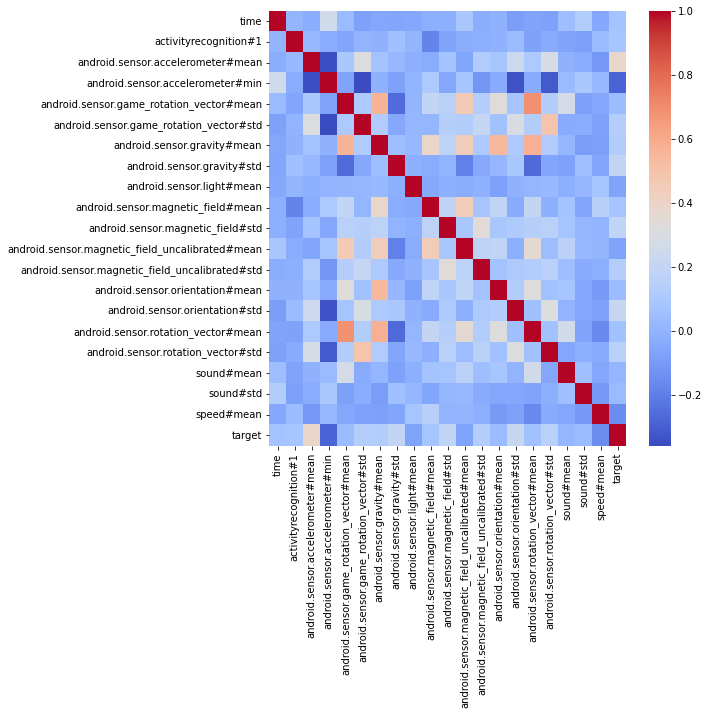

In [ ]:
corr = df1.corr()

plt.figure(figsize=(8,8))  
sns.heatmap(corr, annot = False, cmap = 'coolwarm')

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

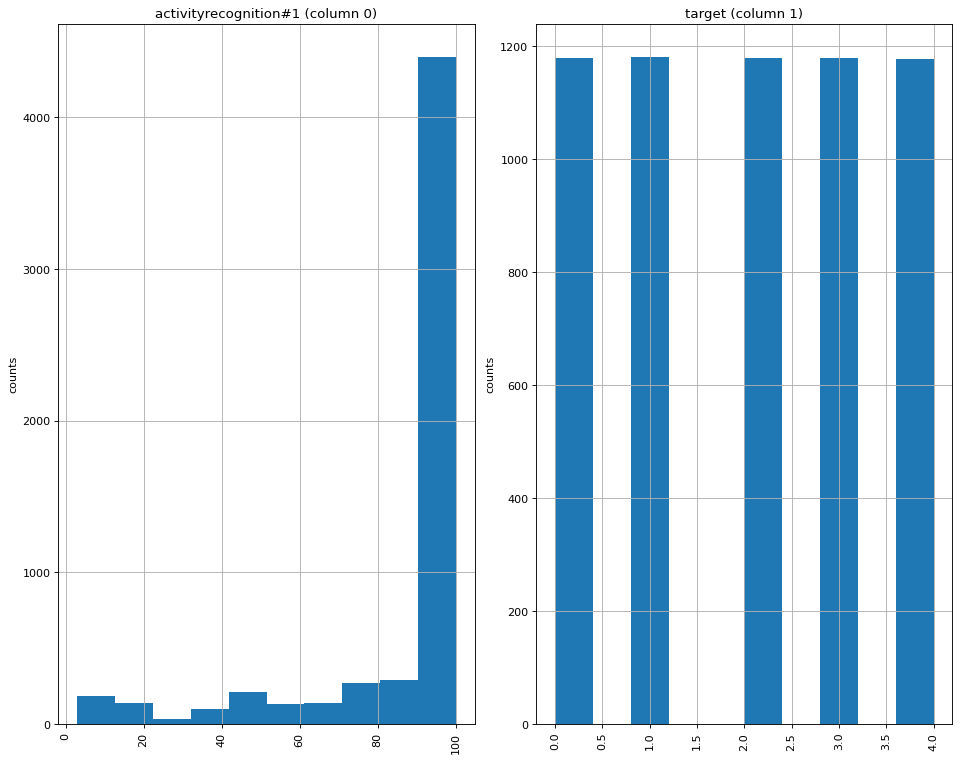

In [ ]:
plotPerColumnDistribution(df1, 10, 5)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5893 entries, 0 to 5892
Data columns (total 21 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   time                                             5893 non-null   int64  
 1   activityrecognition#1                            5893 non-null   int64  
 2   android.sensor.accelerometer#mean                5893 non-null   float64
 3   android.sensor.accelerometer#min                 5893 non-null   float64
 4   android.sensor.game_rotation_vector#mean         5893 non-null   float64
 5   android.sensor.game_rotation_vector#std          5893 non-null   float64
 6   android.sensor.gravity#mean                      5893 non-null   float64
 7   android.sensor.gravity#std                       5893 non-null   float64
 8   android.sensor.light#mean                        5893 non-null   float64
 9   android.sensor.magnetic_field#

In [ ]:

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(df1[['target']]).toarray())

final_df = df1.join(enc_df)


In [ ]:
final_df = final_df.drop(['target'], axis = 1)

In [ ]:
final_df

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#std,android.sensor.gravity#mean,android.sensor.gravity#std,android.sensor.light#mean,android.sensor.magnetic_field#mean,...,android.sensor.rotation_vector#mean,android.sensor.rotation_vector#std,sound#mean,sound#std,speed#mean,0,1,2,3,4
0,78,100,9.811476,9.758895,0.029340,0.000119,9.806650,4.780000e-07,0.000,57.099638,...,0.050413,0.002109,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
1,145,100,9.939207,7.707437,0.999925,0.000030,9.806624,6.470000e-07,0.000,29.351288,...,0.999981,0.000026,89.200210,0.191013,16.539349,0.0,1.0,0.0,0.0,0.0
2,150,100,9.827178,9.804817,0.665215,0.000004,9.806650,2.820000e-07,2.000,29.904927,...,0.610456,0.011312,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
3,105,77,9.673039,7.659674,0.996221,0.003451,9.806638,2.120000e-06,0.000,37.836471,...,0.998112,0.002788,87.470377,2.284186,17.739895,0.0,1.0,0.0,0.0,0.0
4,77,100,9.993466,8.965621,0.563792,0.064792,9.806650,2.640000e-07,30.000,78.375718,...,0.322242,0.025608,89.770732,0.006389,9.000000,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,4,100,10.066610,4.564648,0.986319,0.007186,9.806650,2.230000e-07,4.000,28.551588,...,0.932682,0.008767,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
5889,32,10,9.964271,8.768007,0.648602,0.000331,9.806650,8.170000e-07,126.123,40.665641,...,0.295905,0.018447,0.000000,0.000000,31.960054,0.0,0.0,0.0,1.0,0.0
5890,86,100,9.812893,9.772881,0.024392,0.000211,9.806650,4.290000e-07,0.000,57.026001,...,0.051333,0.002659,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
5891,199,100,9.831144,9.807347,0.481212,0.000002,9.806621,2.930000e-05,16.000,62.277008,...,0.276348,0.000005,0.000000,0.000000,1.090415,0.0,0.0,1.0,0.0,0.0


In [ ]:
X = final_df.iloc[:,0:20] 
y = final_df.iloc[:,20:25]

In [ ]:
X

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#std,android.sensor.gravity#mean,android.sensor.gravity#std,android.sensor.light#mean,android.sensor.magnetic_field#mean,android.sensor.magnetic_field#std,android.sensor.magnetic_field_uncalibrated#mean,android.sensor.magnetic_field_uncalibrated#std,android.sensor.orientation#mean,android.sensor.orientation#std,android.sensor.rotation_vector#mean,android.sensor.rotation_vector#std,sound#mean,sound#std,speed#mean
0,78,100,9.811476,9.758895,0.029340,0.000119,9.806650,4.780000e-07,0.000,57.099638,0.177549,51.363566,0.080899,354.286933,0.245676,0.050413,0.002109,0.000000,0.000000,0.000000
1,145,100,9.939207,7.707437,0.999925,0.000030,9.806624,6.470000e-07,0.000,29.351288,0.921547,82.767760,0.506105,332.695577,1.705816,0.999981,0.000026,89.200210,0.191013,16.539349
2,150,100,9.827178,9.804817,0.665215,0.000004,9.806650,2.820000e-07,2.000,29.904927,0.130851,55.695716,0.128945,74.752653,0.413704,0.610456,0.011312,0.000000,0.000000,0.000000
3,105,77,9.673039,7.659674,0.996221,0.003451,9.806638,2.120000e-06,0.000,37.836471,0.439461,95.743821,0.112446,373.556039,8.870011,0.998112,0.002788,87.470377,2.284186,17.739895
4,77,100,9.993466,8.965621,0.563792,0.064792,9.806650,2.640000e-07,30.000,78.375718,1.104361,157.429217,0.895633,193.201458,181.729455,0.322242,0.025608,89.770732,0.006389,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,4,100,10.066610,4.564648,0.986319,0.007186,9.806650,2.230000e-07,4.000,28.551588,0.381842,56.502261,23.640120,198.025171,0.858121,0.932682,0.008767,0.000000,0.000000,0.000000
5889,32,10,9.964271,8.768007,0.648602,0.000331,9.806650,8.170000e-07,126.123,40.665641,1.755636,85.122017,4.265621,35.427524,1.794702,0.295905,0.018447,0.000000,0.000000,31.960054
5890,86,100,9.812893,9.772881,0.024392,0.000211,9.806650,4.290000e-07,0.000,57.026001,0.209266,51.317797,0.074212,354.182815,0.307487,0.051333,0.002659,0.000000,0.000000,0.000000
5891,199,100,9.831144,9.807347,0.481212,0.000002,9.806621,2.930000e-05,16.000,62.277008,0.636157,270.495205,0.235700,32.077433,0.000209,0.276348,0.000005,0.000000,0.000000,1.090415


In [ ]:
y

,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
5888,0.0,0.0,0.0,0.0,1.0
5889,0.0,0.0,0.0,1.0,0.0
5890,0.0,0.0,1.0,0.0,0.0
5891,0.0,0.0,1.0,0.0,0.0


In [ ]:

from sklearn.preprocessing import MinMaxScaler   #min max scaling

scaler = MinMaxScaler(feature_range=(0,1))

scaler.fit(X)

X_scaled = scaler.transform(X)


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (3771, 20) (3771, 5)
Validation Set -> (943, 20) (943, 5)
Test Set -> (1179, 20) (1179, 5)


In [ ]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from keras.metrics import Precision, Recall
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

In [ ]:

model = Sequential()
model.add(Dense(256, input_shape=(20,)))
model.add(Activation("relu"))
model.add(Dropout(0.40))
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.40))
model.add(Dense(5))
model.add(Activation("softmax"))


In [ ]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               5376      
                                                                 
 activation_15 (Activation)  (None, 256)               0         
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               65792     
                                                                 
 activation_16 (Activation)  (None, 256)               0         
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 5)                

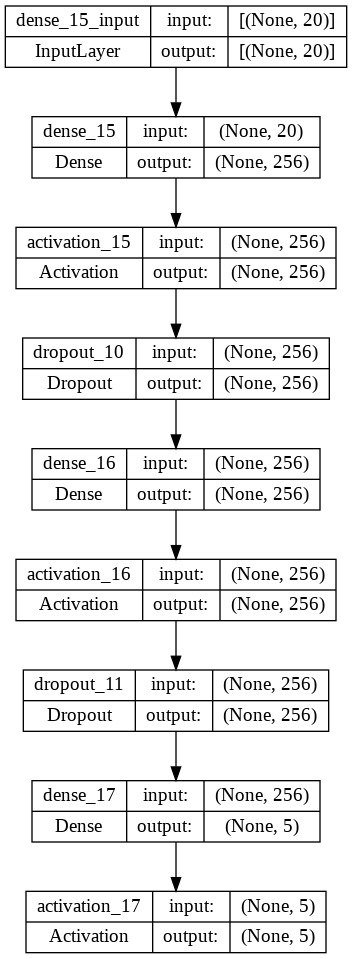

In [ ]:

tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam' , metrics=['accuracy', Precision(), Recall()])

In [ ]:
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=128, epochs=60, verbose=1)

Epoch 1/60
30/30 [==============================] - 1s 17ms/step - loss: 1.4993 - accuracy: 0.3707 - precision_5: 0.9091 - recall_5: 0.0053 - val_loss: 1.2989 - val_accuracy: 0.5684 - val_precision_5: 0.8889 - val_recall_5: 0.0424
Epoch 2/60
30/30 [==============================] - 0s 6ms/step - loss: 1.2009 - accuracy: 0.5349 - precision_5: 0.7613 - recall_5: 0.1793 - val_loss: 1.0442 - val_accuracy: 0.6140 - val_precision_5: 0.8501 - val_recall_5: 0.3128
Epoch 3/60
30/30 [==============================] - 0s 5ms/step - loss: 0.9975 - accuracy: 0.6205 - precision_5: 0.7850 - recall_5: 0.3612 - val_loss: 0.8978 - val_accuracy: 0.6872 - val_precision_5: 0.8203 - val_recall_5: 0.4454
Epoch 4/60
30/30 [==============================] - 0s 5ms/step - loss: 0.8511 - accuracy: 0.6860 - precision_5: 0.8168 - recall_5: 0.4837 - val_loss: 0.8270 - val_accuracy: 0.7200 - val_precision_5: 0.8126 - val_recall_5: 0.5334
Epoch 5/60
30/30 [==============================] - 0s 7ms/step - loss: 0.7744 

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Loss  : {:.4f}'.format(loss))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.9220
Loss  : 0.2640
Precision : 0.9321
Recall    : 0.9084
F1 Score  : 0.9201


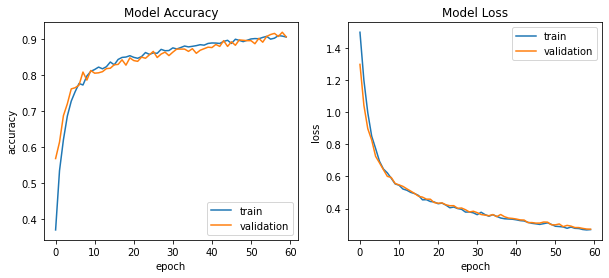

In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

37/37 [==============================] - 0s 2ms/step


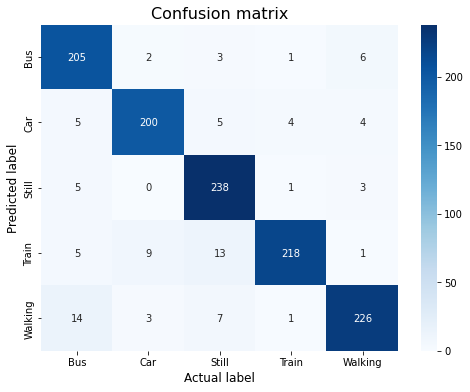

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Bus', 'Car', 'Still', 'Train', 'Walking']    #{'Bus':0,'Car':1,'Still':2,'Train':3,'Walking':4}
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)